# 🎶 Raga Generator & Sarali Player

Kavya

## Table of Contents

Install Dependencies

Imports & Global Settings

Swara & Raga Definitions

Random Raga Generator (Mayamalavagowla)

Tala Visualizer

MIDI Generator

Sarali Varisai Pattern Engine

Animation + Real-Time Audio

Simple Swara Player

Run Demo

#  install required libraries for MIDI

In [ ]:

!pip install midi
!pip install mido



ERROR: Could not find a version that satisfies the requirement midi (from versions: none)
ERROR: No matching distribution found for midi
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.4 MB/s eta 0:00:00


#***Part1: MIDI_RAGA***

Avartana 1: N3 P R1 M1 S' M1 N3 N3
Avartana 2: D1 S' S' P R1 G3 S M1


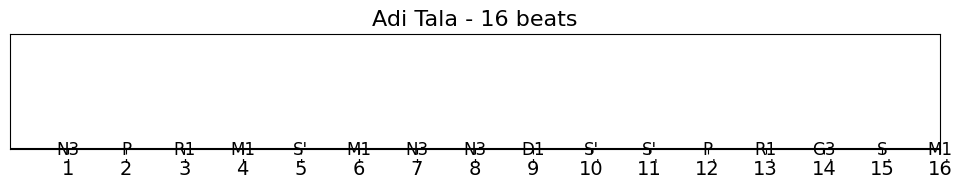

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import random
import mido
from mido import MidiFile, MidiTrack, Message
from google.colab import files
import matplotlib.pyplot as plt


shruti_sa_midi = 56


def get_midi_mapping(shruti_sa):
    return {
        "S": shruti_sa,
        "R1": shruti_sa + 1,
        "G3": shruti_sa + 3,
        "M1": shruti_sa + 5,
        "P": shruti_sa + 7,
        "D1": shruti_sa + 9,
        "N3": shruti_sa + 11,
        "S'": shruti_sa + 12
    }

# Raga notes
mayamalavagowla_swaras = ["S", "R1", "G3", "M1", "P", "D1", "N3", "S'"]

# Generate one avartana (8 swaras)
def generate_avartana():
    return [random.choice(mayamalavagowla_swaras) for _ in range(8)]

# MIDI creation
def generate_midi(avartanas, swara_to_midi, filename="raga_gen.mid"):
    midi_file = MidiFile()
    track = MidiTrack()
    midi_file.tracks.append(track)
    track.append(Message('program_change', program=12))

    for swara in avartanas:
        note = swara_to_midi[swara]
        track.append(Message('note_on', note=note, velocity=64, time=500))
        track.append(Message('note_off', note=note, velocity=64, time=500))

    midi_file.save(filename)
    files.download(filename)

# Visual Tala Counter
def show_tala_with_swaras(swaras, tala_name="Adi Tala"):
    beats = list(range(1, len(swaras)+1))
    tala_labels = [f"{b}̍" for b in beats]  # Tala beat marks

    plt.figure(figsize=(12, 1.5))
    plt.xticks(beats, tala_labels, fontsize=14)
    plt.yticks([])
    plt.title(f"{tala_name} - {len(swaras)} beats", fontsize=16)

    for i, swara in enumerate(swaras):
        plt.text(i+1, 0, swara, fontsize=12, ha='center', va='center')

    plt.axhline(0, color='black')
    plt.show()

# MAIN FLOW
swara_to_midi = get_midi_mapping(shruti_sa_midi)

# Generate 2 avartanas (16 notes)
total_swaras = []
for i in range(2):
    avartana = generate_avartana()
    total_swaras.extend(avartana)
    print(f"Avartana {i+1}: {' '.join(avartana)}")

#  Show Tala Visualization
show_tala_with_swaras(total_swaras)

#  Generate and download MIDI
generate_midi(total_swaras, swara_to_midi)


# ***part2: TALA LOOP***

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


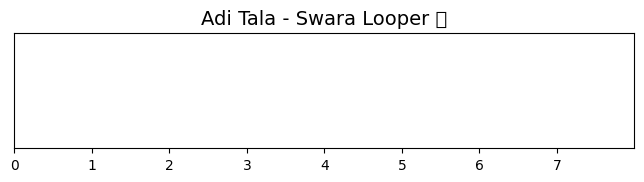

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Audio, display, clear_output
import time
import random

# Sarali Pattern Generator (basic)
def sarali_avartana():
    patterns = [
        ["S", "R1", "G3", "M1", "G3", "M1", "P", "D1"],
        ["S", "S", "R1", "R1", "G3", "G3", "M1", "M1"],
        ["S", "R1", "S", "R1", "G3", "R1", "G3", "M1"]
    ]
    return random.choice(patterns)

# Swara to freq (based on G# ~ 207.65 Hz as Sa)
sa_freq = 207.65
note_ratios = {
    "S": 1,
    "R1": 16/15,
    "G3": 5/4,
    "M1": 4/3,
    "P": 3/2,
    "D1": 5/3,
    "N3": 15/8,
    "S'": 2
}
def swara_to_freq(swara):
    return sa_freq * note_ratios.get(swara, 1)

# Generate tone for each swara
def play_swara(swara, duration=0.4):
    fs = 44100  # sample rate
    freq = swara_to_freq(swara)
    t = np.linspace(0, duration, int(fs * duration), False)
    tone = 0.5 * np.sin(2 * np.pi * freq * t)
    display(Audio(tone, rate=fs, autoplay=True))

#  Tala animation setup
fig, ax = plt.subplots(figsize=(8, 1.5))
beat_dots = ax.scatter([], [], s=500, color='lightgray')
text = ax.text(0.5, 0.5, '', ha='center', va='center', fontsize=16)
ax.set_xlim(0, 8)
ax.set_ylim(0, 1)
ax.set_xticks(range(8))
ax.set_yticks([])
ax.set_title("Adi Tala - Swara Looper 🎵", fontsize=14)


current_swaras = sarali_avartana()
loop_count = 0
max_loops = 5

def update(frame):
    global current_swaras, loop_count
    beat_pos = frame % 8

    ax.clear()
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 1)
    ax.set_xticks(range(8))
    ax.set_yticks([])
    ax.set_title(f"Adi Tala - Cycle {loop_count+1}", fontsize=14)

    # Highlight active beat
    for i in range(8):
        color = 'green' if i == beat_pos else 'lightgray'
        ax.scatter(i + 0.5, 0.5, s=500, color=color)
        ax.text(i + 0.5, 0.5, current_swaras[i], ha='center', va='center', color='black', fontsize=14)

    # Play sound on beat
    if beat_pos < len(current_swaras):
        swara = current_swaras[beat_pos]
        play_swara(swara)

    # After 8 beats, generate next avartana
    if beat_pos == 7:
        loop_count += 1
        if loop_count >= max_loops:
            anim.event_source.stop()
        current_swaras = sarali_avartana()

anim = FuncAnimation(fig, update, frames=range(8 * max_loops), interval=600, repeat=False)
plt.show()


# ***part3: SARALI PLAYER***

In [ ]:
import numpy as np
from IPython.display import Audio, display
import time
import random

# Base frequency (G# as Sa)
sa_freq = 207.65
note_ratios = {
    "S": 1,
    "R1": 16/15,
    "G3": 5/4,
    "M1": 4/3,
    "P": 3/2,
    "D1": 5/3,
    "N3": 15/8,
    "S'": 2
}

def swara_to_freq(swara):
    return sa_freq * note_ratios.get(swara, 1)

def play_swara(swara, duration=0.5):
    fs = 44100
    freq = swara_to_freq(swara)
    t = np.linspace(0, duration, int(fs * duration), False)
    tone = 0.5 * np.sin(2 * np.pi * freq * t)
    print(f"🎵 {swara}")
    audio = Audio(tone, rate=fs, autoplay=True)
    display(audio)
    time.sleep(duration + 0.1)  # wait to finish playing

def sarali_pattern():
    patterns = [
        ["S", "R1", "G3", "M1", "G3", "M1", "P", "D1"],
        ["S", "S", "R1", "R1", "G3", "G3", "M1", "M1"],
        ["S", "R1", "S", "R1", "G3", "R1", "G3", "M1"]
    ]
    return random.choice(patterns)

#  Play 2 avartanas
for cycle in range(2):
    swaras = sarali_pattern()
    print(f"\n Avartana {cycle+1}")
    for swara in swaras:
        play_swara(swara)




 Avartana 1
🎵 S


🎵 S


🎵 R1


🎵 R1


🎵 G3


🎵 G3


🎵 M1


🎵 M1



 Avartana 2
🎵 S


🎵 R1


🎵 S


🎵 R1


🎵 G3


🎵 R1


🎵 G3


🎵 M1
